# Notebook prepared for Photonics course, spring 2021. 
## Juha Muhonen

We shall cover the basics of using qutip to study different optical states and for studying the Jaynes-Cummings Hamiltonian. Of course numerical methods are roughly the same whatever tool you use, but for Python we have our disposal quite a few ready made packages for quantum optics and/or quantum information calculations such as QuTiP (http://qutip.org/) and Qiskit (https://qiskit.org/). Qiskit is more focussed on quantum computing algorithms where as qutip is more a "general purpose" toolbox for quantum system modelling, including optical states and Jaynes-Cummings model.

In [1]:
#Loading packages and setting some plotting parameters
%matplotlib notebook
import qutip as qt
import numpy as np
import time
import matplotlib
import matplotlib.pyplot as plt
plt.interactive(False)

## Visualizing optical (ie, harmonic oscillator) states

First we shall look at the optical states we discussed earlier, namely Fock and coherent states. We can make the relevant state vectors with simple commands.

For a Fock state

In [2]:
# This is the state vector considering a single-mode with n=3 excitations. 
# (The number 50 is the total size of the Hilbert space we consider.)
psi_fock = qt.basis(50,3)
psi_fock

Quantum object: dims = [[50], [1]], shape = (50, 1), type = ket
Qobj data =
[[0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]]

<IPython.core.display.Javascript object>


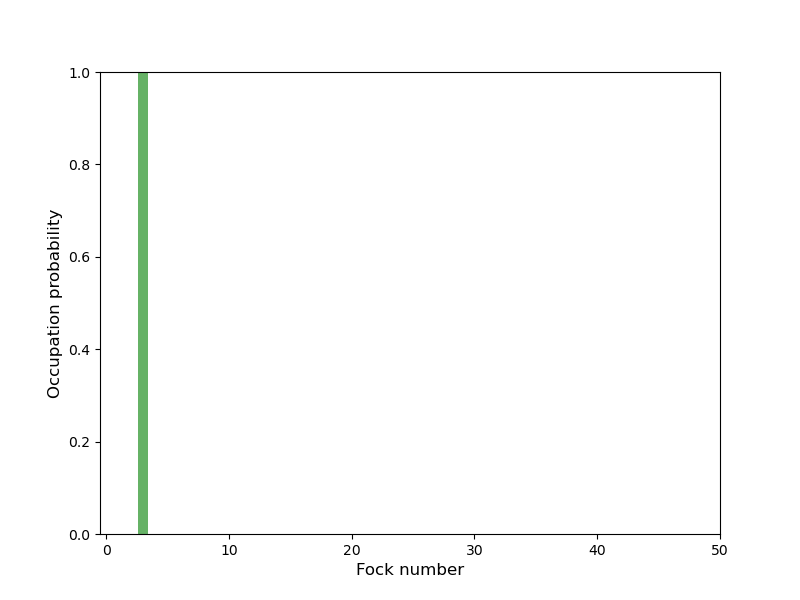

In [3]:
#We can first plot the histogram in the number state basis
qt.plot_fock_distribution(psi_fock)
plt.show()

We can then plot this state in the "Husimi Q-representation" which is essentially the same quadrature picture we considered in lectures and in the book.

<IPython.core.display.Javascript object>


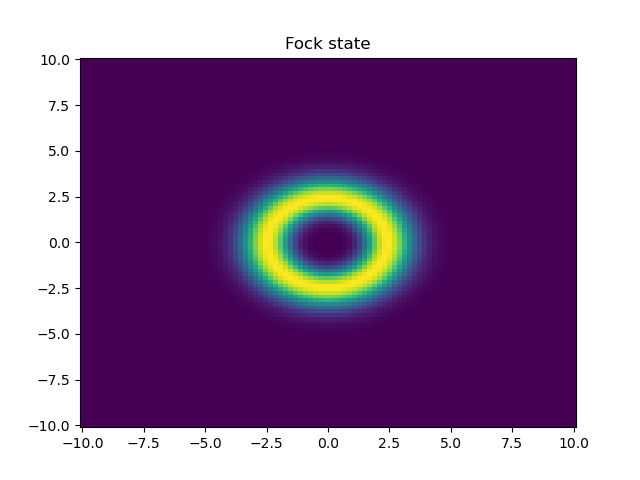

In [4]:
xvec = np.linspace(-10,10,100)
Q_fock = qt.qfunc(psi_fock,xvec,xvec)

plt.pcolormesh(xvec, xvec, Q_fock,shading='auto')
plt.title('Fock state')
plt.show()

Let's do the same for a coherent state, which has quite a bit more complicated state vector

In [5]:
psi_coherent = qt.coherent(50,3) #Why did we increase the size of the Hilbert space? Try with 10 and find out...
psi_coherent

Quantum object: dims = [[50], [1]], shape = (50, 1), type = ket
Qobj data =
[[1.11089965e-02]
 [3.33269896e-02]
 [7.06972211e-02]
 [1.22451179e-01]
 [1.83676768e-01]
 [2.46428244e-01]
 [3.01811728e-01]
 [3.42222332e-01]
 [3.62981597e-01]
 [3.62981597e-01]
 [3.44354579e-01]
 [3.11480436e-01]
 [2.69749971e-01]
 [2.24445542e-01]
 [1.79956783e-01]
 [1.39393925e-01]
 [1.04545444e-01]
 [7.60679836e-02]
 [5.37881870e-02]
 [3.70195692e-02]
 [2.48334820e-02]
 [1.62573301e-02]
 [1.03982233e-02]
 [6.50453831e-03]
 [3.98319997e-03]
 [2.38991998e-03]
 [1.40610561e-03]
 [8.11815452e-04]
 [4.60256099e-04]
 [2.56402236e-04]
 [1.40437288e-04]
 [7.56698448e-05]
 [4.01299953e-05]
 [2.09572065e-05]
 [1.07823938e-05]
 [5.46767161e-06]
 [2.73383580e-06]
 [1.34831951e-06]
 [6.56178922e-07]
 [3.15218159e-07]
 [1.49521098e-07]
 [7.00538259e-08]
 [3.24285949e-08]
 [1.48360148e-08]
 [6.70964098e-09]
 [3.00118192e-09]
 [1.32607697e-09]
 [5.83948436e-10]
 [2.43658747e-10]
 [1.26956485e-10]]

<IPython.core.display.Javascript object>


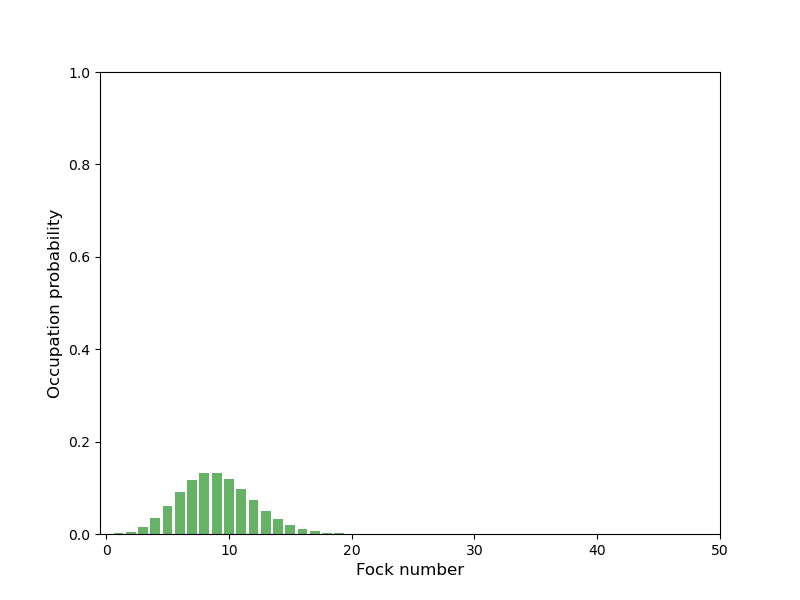

In [6]:
#We can first plot the histogram in the number state basis
qt.plot_fock_distribution(psi_coherent)
plt.show()

<IPython.core.display.Javascript object>


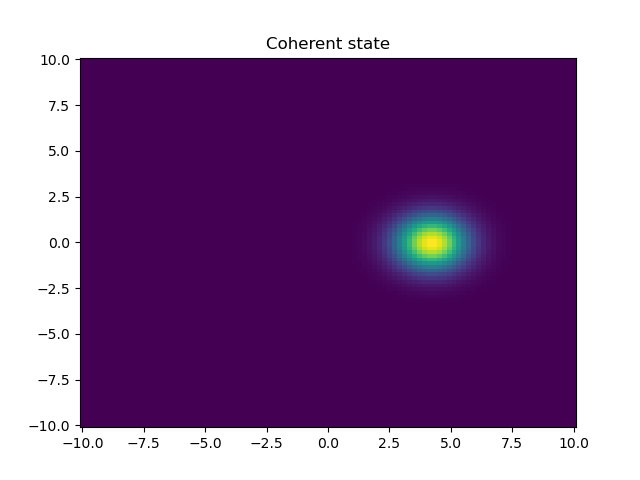

In [7]:
xvec = np.linspace(-10,10,100)
Q_coherent = qt.qfunc(psi_coherent,xvec,xvec)

plt.pcolormesh(xvec, xvec, Q_coherent,shading='auto')
plt.title('Coherent state')
plt.show()

We can also study the expecation values for different operators for these states.

In [8]:
#Let's define the creation and annihilation operators in this Hilbert space, and hence the number operator
a_dag = qt.create(50)
a = qt.destroy(50)
N = a_dag*a

In [9]:
#So what is the expectation value for the number operator?
n_fock = qt.expect(N,psi_fock)
n_coh = qt.expect(N,psi_coherent)

print("For the above Fock state: " + str(n_fock))
print("For the above coherent state: "+ str(n_coh))

For the above Fock state: 2.9999999999999996
For the above coherent state: 8.999999999999995


We can also define the quadrature operators and look at their expectation values


In [10]:
# The normalization factor 1/sqrt(2) is to make these match with the plots
X = 1/np.sqrt(2)*(a+a_dag)
P = 1/np.sqrt(2)*-1.0j*(a-a_dag)

In [11]:
X_fock = qt.expect(X,psi_fock)
X_coh = qt.expect(X,psi_coherent)

print("For the above Fock state: " + str(X_fock))
print("For the above coherent state: "+ str(X_coh))

For the above Fock state: 0.0
For the above coherent state: 4.242640687119283


In [12]:
P_fock = qt.expect(P,psi_fock)
P_coh = qt.expect(P,psi_coherent)

print("For the above Fock state: " + str(P_fock))
print("For the above coherent state: "+ str(P_coh))

For the above Fock state: 0.0
For the above coherent state: 0.0


Try playing around with the parameters of the states and see what you get. How would you check the variances of the states? What are the coordinate axes of the plots? (You can try to figure this out by looking at the mean and variance of the quadrature operators..)

## Atom states, ie, two-level states

The two level system is basically just the same as the Fock state above, with the Hilbert space of dimension two. There is a slight complication with the notation here as basis(2,1) will be the ground state and basis(2,0) is the excited state

In [13]:
psi_excited = qt.basis(2,0)
psi_excited

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[1.]
 [0.]]

In [14]:
psi_ground = qt.basis(2,1)
psi_ground

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.]
 [1.]]

For the purposes of this lecture, we just need the raising and lowering operators for the Jaynes-Cummings model

In [15]:
s_minus = qt.sigmam()
s_plus = qt.sigmap()

In [16]:
s_minus*psi_excited

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.]
 [1.]]

In [17]:
s_minus*psi_ground

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.]
 [0.]]

In [18]:
s_plus*psi_excited

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[0.]
 [0.]]

In [19]:
s_plus*psi_ground

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[1.]
 [0.]]

In [20]:
# We also need the matrix for the atom energy 
e_atom = (qt.sigmaz()+1)/2
e_atom

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[1. 0.]
 [0. 0.]]

# Jaynes-Cummings model

Now we need to first of all make the combined state space of the atom and the optical mode. This is done with the tensor product. Hence we also need to define the operators so that they operate on the correct subspace

In [21]:
N = 50
a = qt.tensor(qt.identity(2), qt.destroy(N)) #Annihilation operator in the combined (qubit+oscillator) Hilbert space
a_dag = qt.tensor(qt.identity(2), qt.create(N)) #Creation operator in the combined (qubit+oscillator) Hilbert space
s_minus = qt.tensor(qt.sigmam(), qt.identity(N)) #Sigma-minus operator in the combined space
s_plus = qt.tensor(qt.sigmap(), qt.identity(N)) #Sigma-plus operator in the combined space
atom_energy = qt.tensor(e_atom,qt.identity(N)) #Atom energy operator in the combined space

In [22]:
#Standard JC Hamiltonian (ie,with Rotating Wave Approximation)
omega_a = 1 #Atom resonance frequency
omega_c = 1.01 #Optical cavity resonance frequency
g = 0.05 #Rabi frequency

H = omega_a * atom_energy + omega_c * a_dag * a + g * (a_dag * s_minus  + a * s_plus)

In [23]:
#Start from the state where the qubit is in the ground state and there is one excitation in the cavity
psi0 = qt.tensor(qt.basis(2, 1),qt.basis(N,1)) 
#Time points to simulate
times = np.linspace(0, 200, 2000)

# This is a function that solves the Schrödinger equation and calculates the expectation values 
# for given operators at different time points. We will solve for atom state and number operator for photons.
# Parameters: Hamiltonian, starting state, time points, expectation values to be solved.
result = qt.sesolve(H, psi0, times, e_ops=[atom_energy,a_dag*a])

<IPython.core.display.Javascript object>


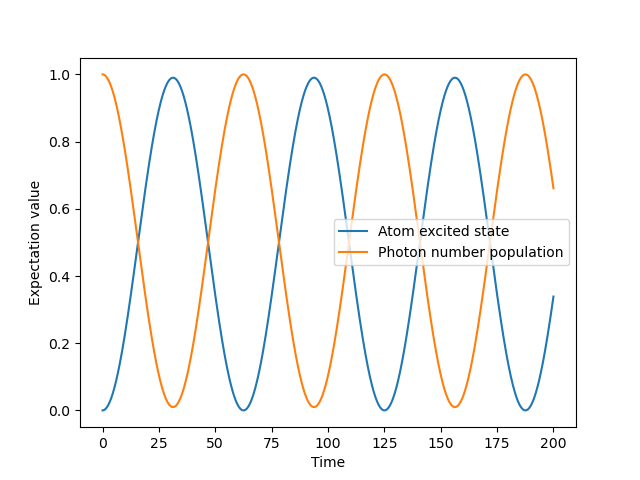

In [24]:
# We can now plot the expectation values and hopefully see vacuum Rabi oscillations
plt.plot(times,result.expect[0], label = 'Atom excited state')
plt.plot(times,result.expect[1], label = 'Photon number population')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Expectation value')
plt.show()

Try now changing the Jaynes-Cummings parameters and see how the plot changes.

### Rabi revivals

In [25]:
# Now we can start with the cavity in a coherent state and reproduce the rabi revival picture in the book
psi0 = qt.tensor(qt.basis(2, 1),qt.coherent(N,4)) 
times = np.linspace(0, 500, 2000)

# This is a function that solves the Schrödinger equation and calculates the expectation values 
# for given operators at different time points. We will solve for atom state and number operator for photons.
# Parameters: Hamiltonian, starting state, time points, expectation values to be solved.
result = qt.sesolve(H, psi0, times, e_ops=[atom_energy,a_dag*a])

<IPython.core.display.Javascript object>


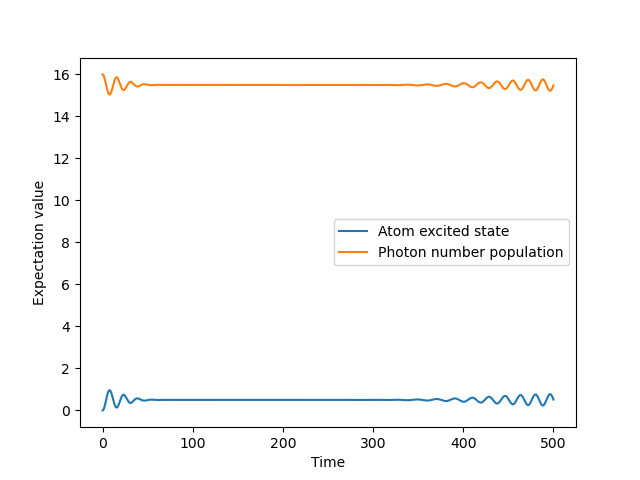

In [26]:
plt.plot(times,result.expect[0], label = 'Atom excited state')
plt.plot(times,result.expect[1], label = 'Photon number population')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Expectation value')
plt.show()